In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/kirtan/Downloads/playground-series-s3e26/train.csv')

In [3]:
df.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0   0     999  D-penicillamine  21532   M       N            N       N     N   
1   1    2574          Placebo  19237   F       N            N       N     N   
2   2    3428          Placebo  13727   F       N            Y       Y     Y   
3   3    2576          Placebo  18460   F       N            N       N     N   
4   4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1        0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2        3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3        0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4        1.1        346.0     3.65    63.0    1181.0  125.55           96.0   

   Platelets  Prothrombin  Stage Status  
0      394.0          9.7    3.0      D  
1      361.0         11.0    3.0      C  
2      199.0         11.7    4.0      D  
3      269.0         10.7    3.0      C  
4      298.0         10.6    4.0      C

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [5]:
df.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [6]:
df.drop(columns='id', inplace=True)

In [18]:
df.shape

(7905, 19)

In [7]:
cat_col = []
num_col = []

for col in df.columns:
    if df[col].dtype == 'object':
        cat_col.append(col)
    else:
        num_col.append(col)

In [13]:
for col in cat_col:
    print(col, "-", len(df[col].unique()))

Drug - 2
Sex - 2
Ascites - 2
Hepatomegaly - 2
Spiders - 2
Edema - 3
Status - 3


# Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
LE = {}

In [16]:
for col in cat_col:
    LE[col] = LabelEncoder()
    df[col] = LE[col].fit_transform(df[col])

In [17]:
df.head()

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  Bilirubin  \
0     999     0  21532    1        0             0        0      0        2.3   
1    2574     1  19237    0        0             0        0      0        0.9   
2    3428     1  13727    0        0             1        1      2        3.3   
3    2576     1  18460    0        0             0        0      0        0.6   
4     788     1  16658    0        0             1        0      0        1.1   

   Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  Platelets  \
0        316.0     3.35   172.0    1601.0  179.80           63.0      394.0   
1        364.0     3.54    63.0    1440.0  134.85           88.0      361.0   
2        299.0     3.55   131.0    1029.0  119.35           50.0      199.0   
3        256.0     3.50    58.0    1653.0   71.30           96.0      269.0   
4        346.0     3.65    63.0    1181.0  125.55           96.0      298.0   

   Prothrombin  Stage  Status  
0          9.7    3.0       2  
1         11.0    3.0       0  
2         11.7    4.0       2  
3         10.7    3.0       0  
4         10.6    4.0       0

# Data Visualization

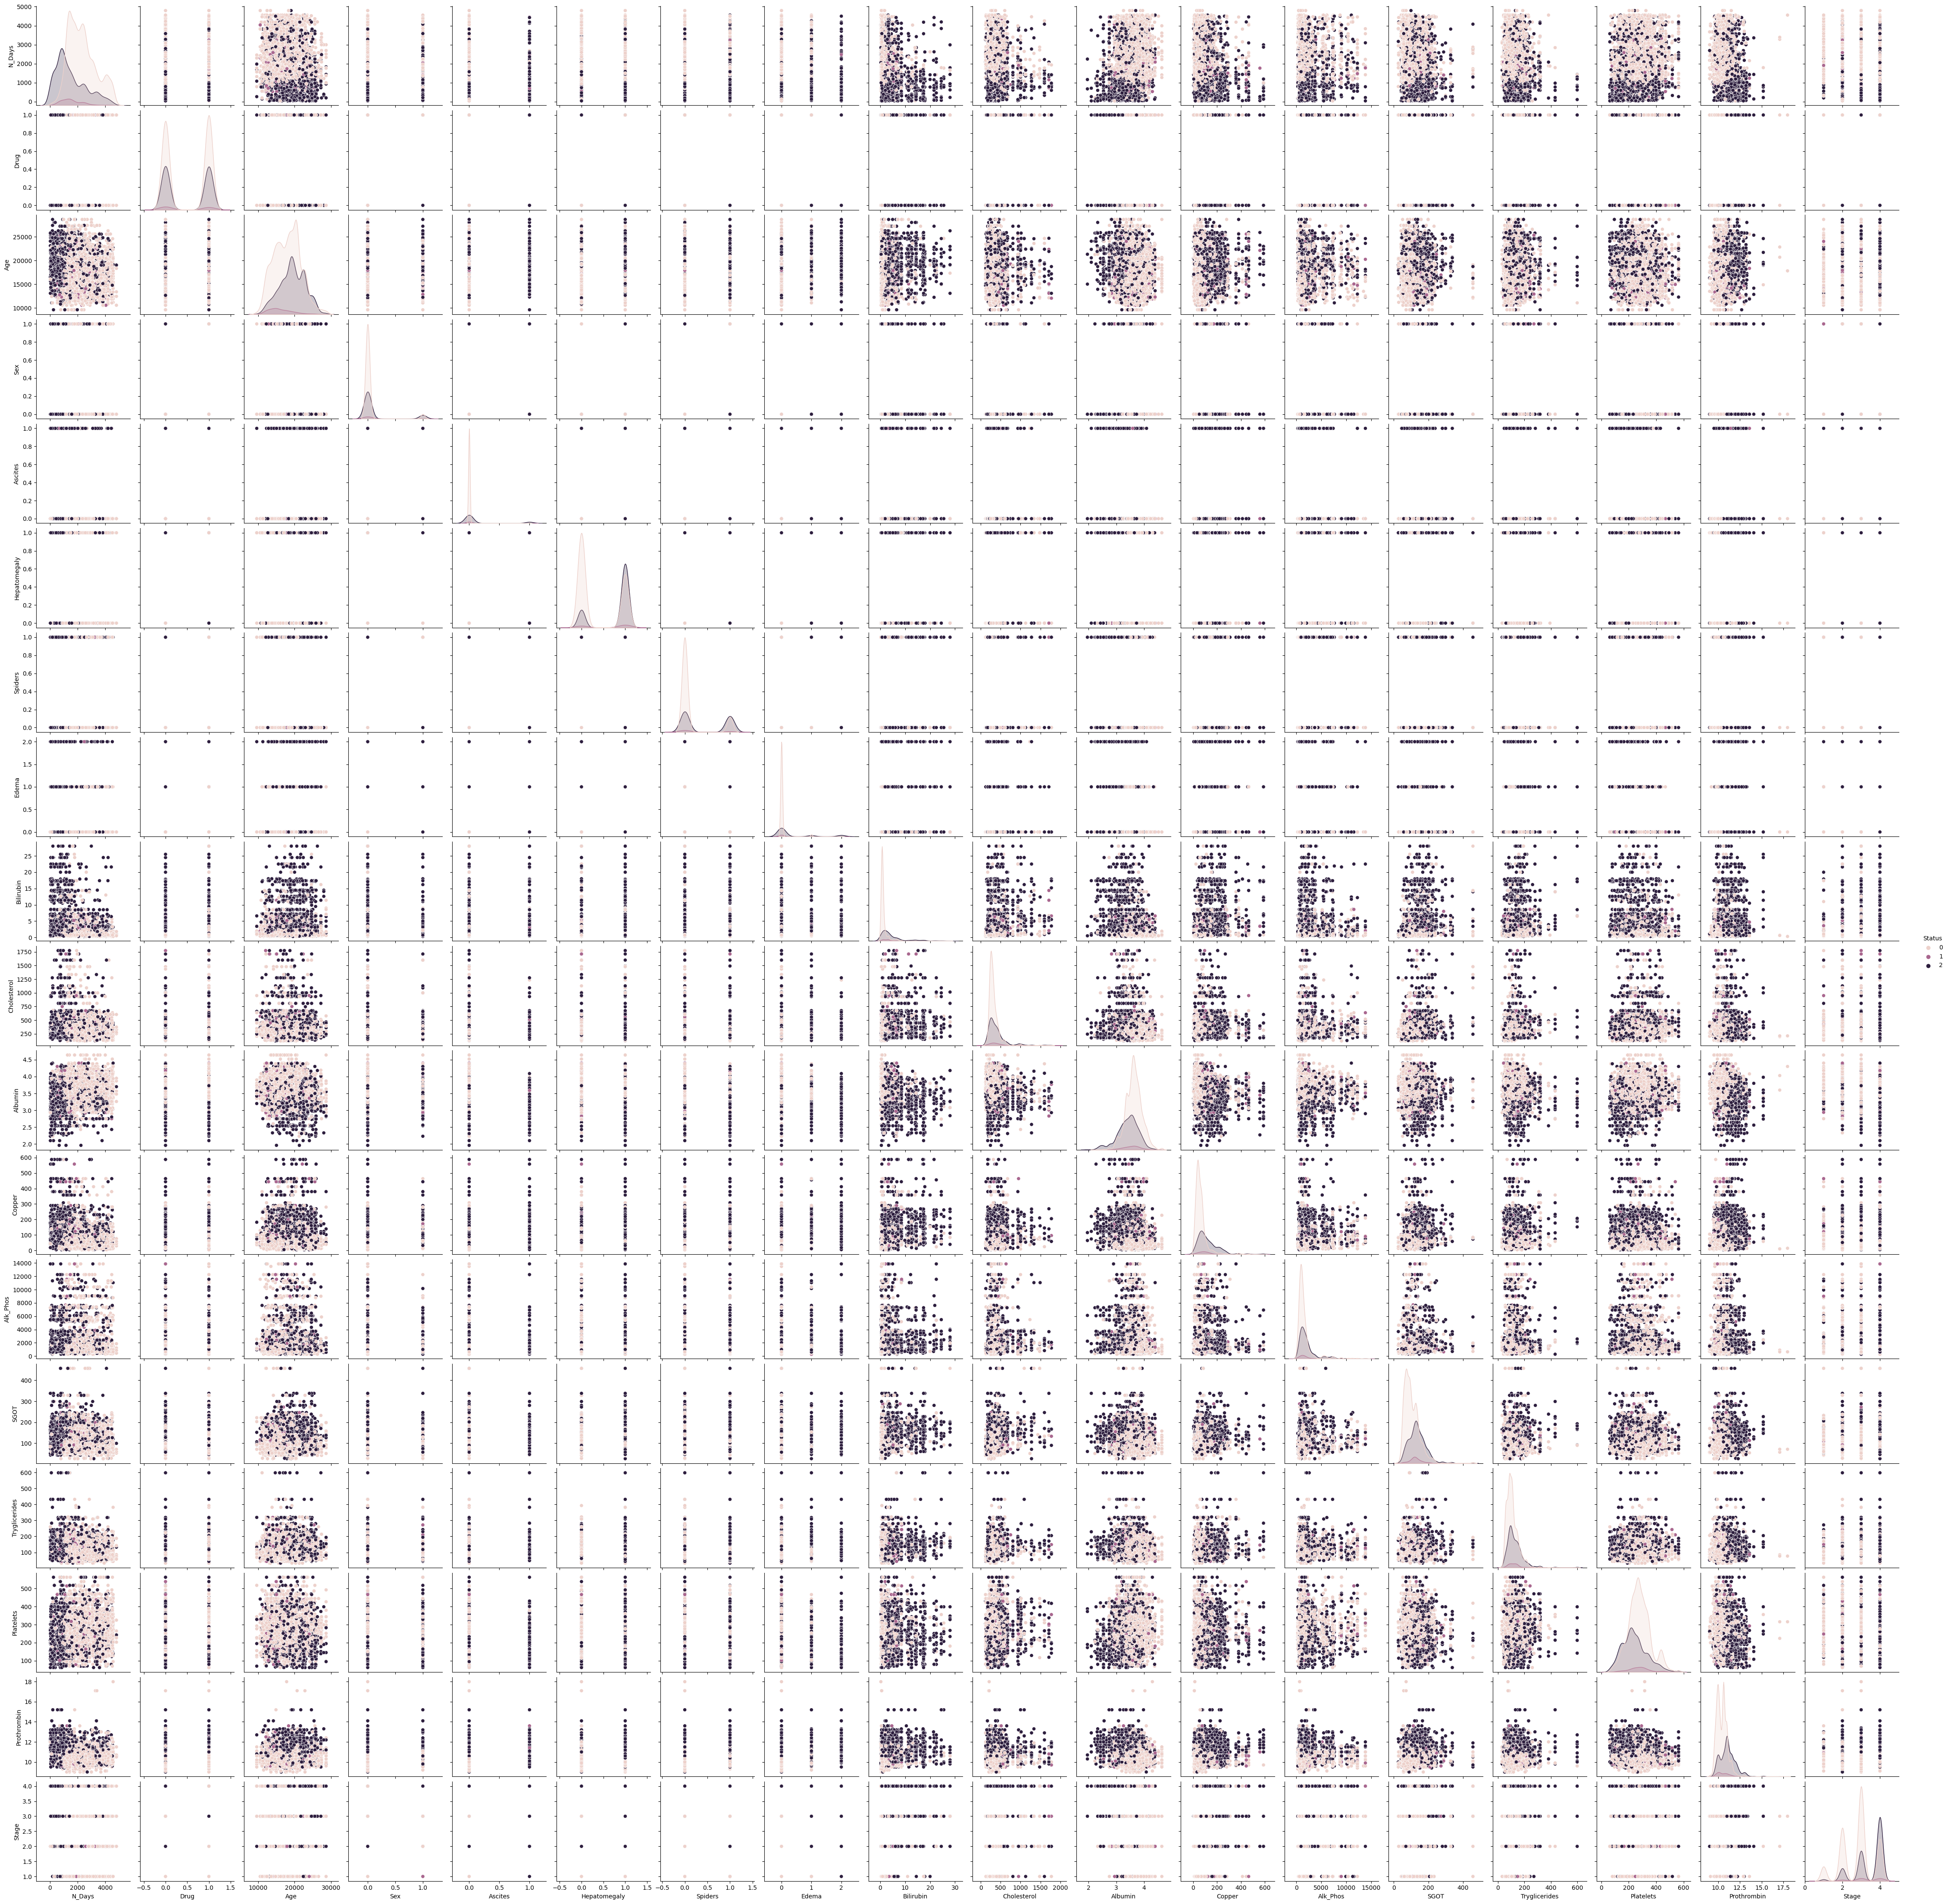

In [19]:
sns.pairplot(df, hue='Status')
plt.show()

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='jet', annot=True, linecolor='black', linewidth=0.5)
plt.show()

In [54]:
sns.countplot(data=df, x='Status')
plt.show()

# Train & Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.iloc[:,:-1]
X

N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0        999     0  21532    1        0             0        0      0   
1       2574     1  19237    0        0             0        0      0   
2       3428     1  13727    0        0             1        1      2   
3       2576     1  18460    0        0             0        0      0   
4        788     1  16658    0        0             1        0      0   
...      ...   ...    ...  ...      ...           ...      ...    ...   
7900    1166     0  16839    0        0             0        0      0   
7901    1492     1  17031    0        0             1        0      0   
7902    1576     0  25873    0        0             0        1      1   
7903    3584     0  22960    1        0             1        0      0   
7904    1978     0  19237    0        0             0        0      0   

      Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0           2.3        316.0     3.35   172.0    1601.0  179.80   
1           0.9        364.0     3.54    63.0    1440.0  134.85   
2           3.3        299.0     3.55   131.0    1029.0  119.35   
3           0.6        256.0     3.50    58.0    1653.0   71.30   
4           1.1        346.0     3.65    63.0    1181.0  125.55   
...         ...          ...      ...     ...       ...     ...   
7900        0.8        309.0     3.56    38.0    1629.0   79.05   
7901        0.9        260.0     3.43    62.0    1440.0  142.00   
7902        2.0        225.0     3.19    51.0     933.0   69.75   
7903        0.7        248.0     2.75    32.0    1003.0   57.35   
7904        0.7        256.0     3.23    22.0     645.0   74.40   

      Tryglicerides  Platelets  Prothrombin  Stage  
0              63.0      394.0          9.7    3.0  
1              88.0      361.0         11.0    3.0  
2              50.0      199.0         11.7    4.0  
3              96.0      269.0         10.7    3.0  
4              96.0      298.0         10.6    4.0  
...             ...        ...          ...    ...  
7900          224.0      344.0          9.9    2.0  
7901           78.0      277.0         10.0    4.0  
7902           62.0      200.0         12.7    2.0  
7903          118.0      221.0         10.6    4.0  
7904           85.0      336.0         10.3    3.0  

[7905 rows x 18 columns]

In [25]:
y = df['Status']
y

0       2
1       0
2       2
3       0
4       0
       ..
7900    0
7901    0
7902    2
7903    2
7904    0
Name: Status, Length: 7905, dtype: int64

# Handling Class Imbalance

In [57]:
from imblearn.over_sampling import RandomOverSampler

In [59]:
ROS = RandomOverSampler()

In [60]:
tempX, tempy = ROS.fit_resample(X, y)

In [67]:
sns.countplot(data=df, x=tempy)
plt.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(tempX, tempy, test_size=0.2, random_state=42)

# Model Training

In [73]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [74]:
Models = {
    'DT' : DecisionTreeClassifier(),
    'RF' : RandomForestClassifier(),
    'GB' : GradientBoostingClassifier()
}

In [75]:
for model_name, model in Models.items():
    model.fit(X_train, y_train)

In [78]:
for model_name, model in Models.items():
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)

    print(f"Model: {model_name}")
    print(f"Predictions: {predictions}")
    print(f"Accuracy: {accuracy}\n")
    print(f"{classification_report(predictions, y_test)}")
    print("---------------------------------------------------\n")

Model: DT
Predictions: [0 1 2 ... 2 1 0]
Accuracy: 0.8932527693856999

              precision    recall  f1-score   support

           0       0.79      0.90      0.85       917
           1       1.00      0.95      0.97      1069
           2       0.89      0.82      0.86       993

    accuracy                           0.89      2979
   macro avg       0.89      0.89      0.89      2979
weighted avg       0.90      0.89      0.89      2979

---------------------------------------------------

Model: RF
Predictions: [0 1 2 ... 2 1 0]
Accuracy: 0.9439409197717354

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       998
           1       1.00      1.00      1.00      1018
           2       0.93      0.89      0.91       963

    accuracy                           0.94      2979
   macro avg       0.94      0.94      0.94      2979
weighted avg       0.94      0.94      0.94      2979

-------------------------------------------

# Submission

In [68]:
sub_df = pd.read_csv('/Users/kirtan/Downloads/playground-series-s3e26/sample_submission.csv')

In [69]:
sub_df.head()

id  Status_C  Status_CL  Status_D
0  7905  0.628084   0.034788  0.337128
1  7906  0.628084   0.034788  0.337128
2  7907  0.628084   0.034788  0.337128
3  7908  0.628084   0.034788  0.337128
4  7909  0.628084   0.034788  0.337128

In [79]:
test_df = pd.read_csv('/Users/kirtan/Downloads/playground-series-s3e26/test.csv')

In [80]:
test_df.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0  7905    3839  D-penicillamine  19724   F       N            Y       N   
1  7906    2468  D-penicillamine  14975   F       N            N       N   
2  7907      51          Placebo  13149   F       N            Y       N   
3  7908    2330  D-penicillamine  20510   F       N            N       N   
4  7909    1615  D-penicillamine  21904   F       N            Y       N   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     N        1.2        546.0     3.37    65.0    1636.0  151.90   
1     N        1.1        660.0     4.22    94.0    1257.0  151.90   
2     Y        2.0        151.0     2.96    46.0     961.0   69.75   
3     N        0.6        293.0     3.85    40.0     554.0  125.55   
4     N        1.4        277.0     2.97   121.0    1110.0  125.00   

   Tryglicerides  Platelets  Prothrombin  Stage  
0           90.0      430.0         10.6    2.0  
1          155.0      227.0         10.0    2.0  
2          101.0      213.0         13.0    4.0  
3           56.0      270.0         10.6    2.0  
4          126.0      221.0          9.8    1.0

In [81]:
test_X = test_df.drop(columns='id')

In [82]:
test_X.head()

N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0    3839  D-penicillamine  19724   F       N            Y       N     N   
1    2468  D-penicillamine  14975   F       N            N       N     N   
2      51          Placebo  13149   F       N            Y       N     Y   
3    2330  D-penicillamine  20510   F       N            N       N     N   
4    1615  D-penicillamine  21904   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        1.2        546.0     3.37    65.0    1636.0  151.90           90.0   
1        1.1        660.0     4.22    94.0    1257.0  151.90          155.0   
2        2.0        151.0     2.96    46.0     961.0   69.75          101.0   
3        0.6        293.0     3.85    40.0     554.0  125.55           56.0   
4        1.4        277.0     2.97   121.0    1110.0  125.00          126.0   

   Platelets  Prothrombin  Stage  
0      430.0         10.6    2.0  
1      227.0         10.0    2.0  
2      213.0         13.0    4.0  
3      270.0         10.6    2.0  
4      221.0          9.8    1.0

In [86]:
cat_col_test = []
num_col_test = []

for col in test_X.columns:
    if test_X[col].dtype == 'object':
        cat_col_test.append(col)
    else:
        num_col_test.append(col)

In [87]:
for col in cat_col_test:
    test_X[col] = LE[col].transform(test_X[col])

In [90]:
predictions = Models['RF'].predict_proba(test_X)

In [95]:
predictions

array([[0.54, 0.01, 0.45],
       [0.58, 0.17, 0.25],
       [0.14, 0.05, 0.81],
       ...,
       [0.92, 0.  , 0.08],
       [0.92, 0.04, 0.04],
       [0.29, 0.02, 0.69]])

In [102]:
submission = {
    'id' : test_df['id'],
    'Status_C' : predictions[:,:1].ravel(),
    'Status_CL' : predictions[:,1:2].ravel(),
    'Status_D' : predictions[:,2:3].ravel()
}

In [103]:
sub = pd.DataFrame(submission)

In [104]:
sub.head()

id  Status_C  Status_CL  Status_D
0  7905      0.54       0.01      0.45
1  7906      0.58       0.17      0.25
2  7907      0.14       0.05      0.81
3  7908      0.92       0.00      0.08
4  7909      0.59       0.05      0.36

In [106]:
Final_Submission = sub.to_csv('/Users/kirtan/Downloads/playground-series-s3e26/Final_Submission.csv', index=False)